In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [6]:
#Reading the data
df = pd.read_csv(r"C:\Users\Msc 1\Desktop\Sairaj\MDSC-102\final_lab\SeoulBikeData.csv", encoding='ISO-8859-1')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
#counting values of no. of holidays
count = df['Holiday'].value_counts()
count


No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [8]:
#Checking if there is any null values are there or not
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
#checking no. of rows and cols
df.shape

(8760, 14)

In [10]:
#info about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [11]:
#getting more information about the data
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [12]:
#Checking the data Types of all  the columns
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [13]:
#get the columns name
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [14]:
df['Rented Bike Count'].max()
# To find the max number of bikes rented on a  day

3556

In [15]:
df.head()#to get first few rows of the data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


C:\Users\Msc 1\AppData\Local\Temp\ipykernel_9808\3809247950.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


(array([17167., 17257., 17348., 17440., 17532., 17622., 17713., 17805.,
        17897.]),
 [Text(17167.0, 0, '2017-01'),
  Text(17257.0, 0, '2017-04'),
  Text(17348.0, 0, '2017-07'),
  Text(17440.0, 0, '2017-10'),
  Text(17532.0, 0, '2018-01'),
  Text(17622.0, 0, '2018-04'),
  Text(17713.0, 0, '2018-07'),
  Text(17805.0, 0, '2018-10'),
  Text(17897.0, 0, '2019-01')])

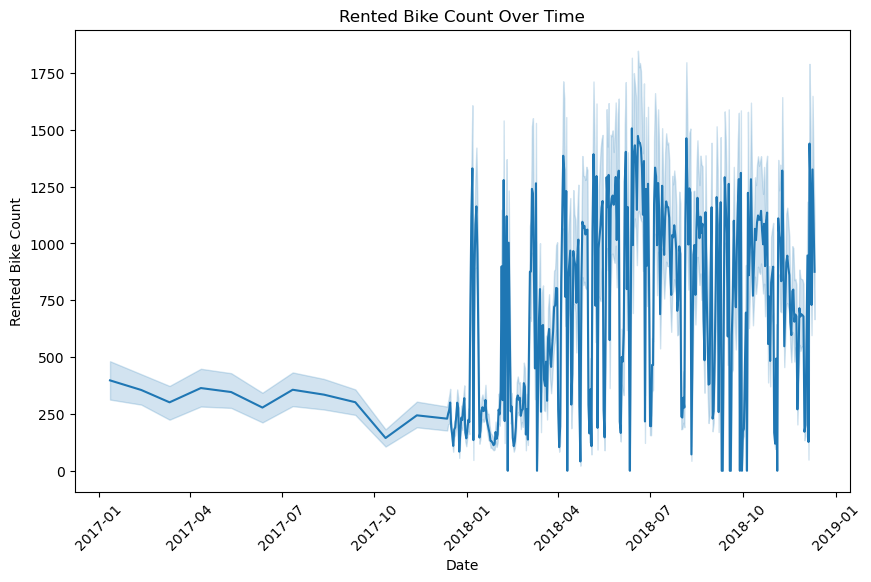

In [16]:
plt.figure(figsize=(10,6))
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)
sns.lineplot(data=df, x='Date', y='Rented Bike Count')
plt.title('Rented Bike Count Over Time')
plt.xlabel('Date')
plt.ylabel('Rented Bike Count')
plt.xticks(rotation=45)

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

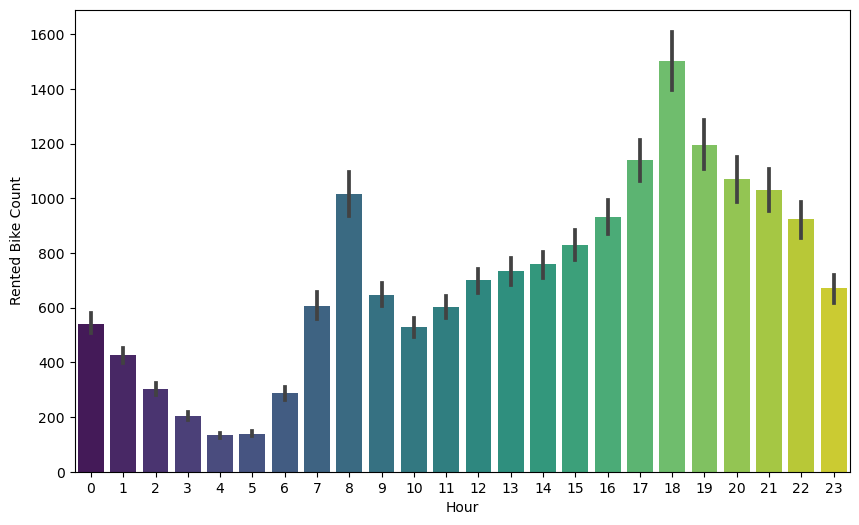

In [17]:
plt.figure(figsize=(10, 6))  # Adjusting the figure size 
sns.barplot(x='Hour', y='Rented Bike Count', data=df, palette='viridis')

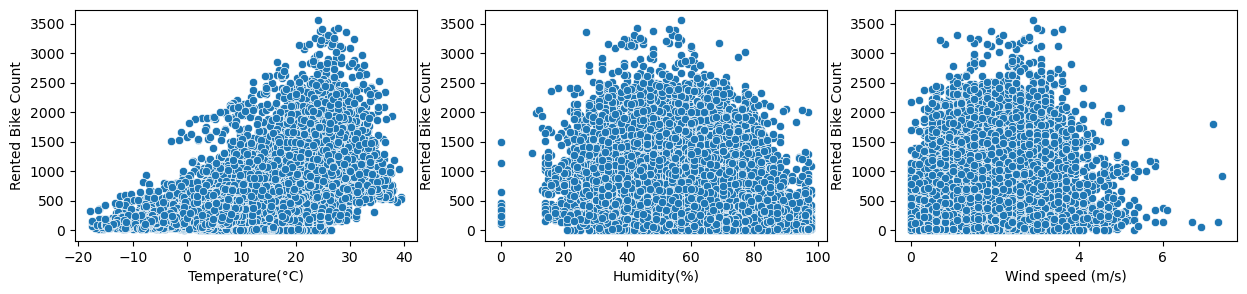

In [18]:
cols_for_scatterplot = ['Temperature(°C)', 'Humidity(%)',  'Wind speed (m/s)']
i=1
plt.figure(figsize=(15,3))
for feature in cols_for_scatterplot:
    plt.subplot(1,3,i)
    sns.scatterplot(y=df['Rented Bike Count'],x=df[feature])
    i+=1


Text(0.5, 1.0, 'Boxplot of Rented Bike Count by Seasons')

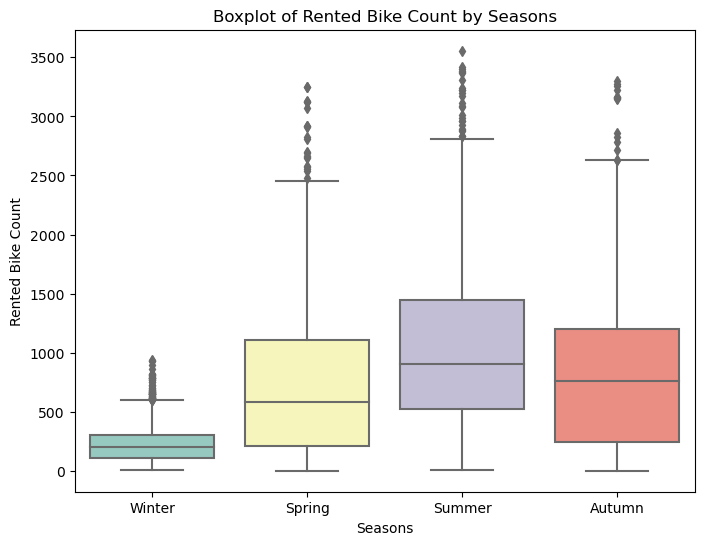

In [19]:
# Create a boxplot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.boxplot(x='Seasons', y='Rented Bike Count', data=df, palette='Set3')
plt.title('Boxplot of Rented Bike Count by Seasons')

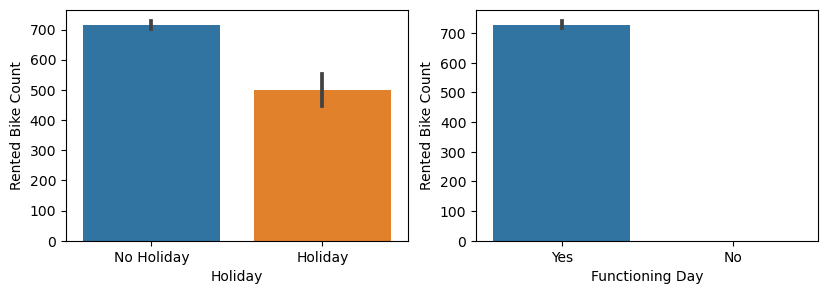

In [20]:
cols_for_barplot = ['Holiday', 'Functioning Day']
i=1
plt.figure(figsize=(15,3))
for feature in cols_for_barplot:
    plt.subplot(1,3,i)
    sns.barplot(y=df['Rented Bike Count'],x=df[feature])
    i+=1

In [21]:
df.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [22]:
# making a copy of the original dataframe and drop few cols which we dont want for our next operation
new_df = df.copy()

new_df.drop(df.columns[[0,6,8,9,10,11,12,13]], axis=1, inplace=True)

new_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Dew point temperature(°C)
0,254,0,-5.2,37,2.2,-17.6
23,323,23,-1.3,84,1.0,-3.6
22,398,22,-0.9,83,1.5,-3.4
21,405,21,-0.8,81,0.8,-3.6
20,426,20,-0.3,79,1.5,-3.5


<Axes: >

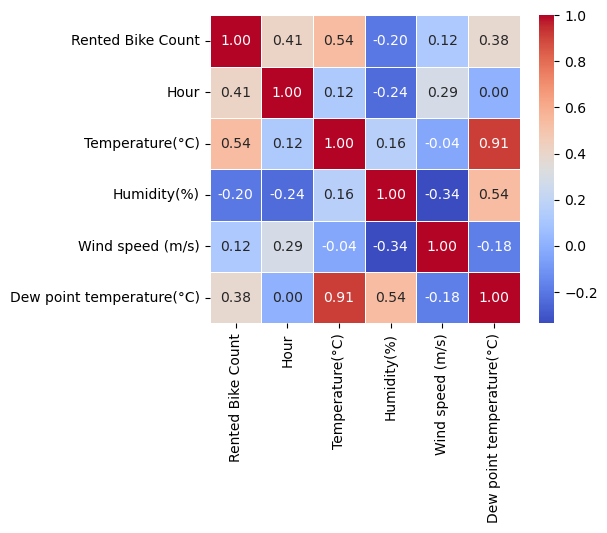

In [23]:
#Plotting the HEatmap
# Calculate the correlation matrix
correlation_matrix = new_df.corr()

# Create a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [24]:
#We will compute the further computations with out old data set
df['Rented Bike Count'].skew()

1.1534281773679014

In [25]:
df.skew()#skewness of the entire data

C:\Users\Msc 1\AppData\Local\Temp\ipykernel_9808\666369702.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()#skewness of the entire data


Rented Bike Count             1.153428
Hour                          0.000000
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Solar Radiation (MJ/m2)       1.504040
Rainfall(mm)                 14.533232
Snowfall (cm)                 8.440801
dtype: float64

Text(0.5, 1.0, ' Histogram for Rented Bike Count')

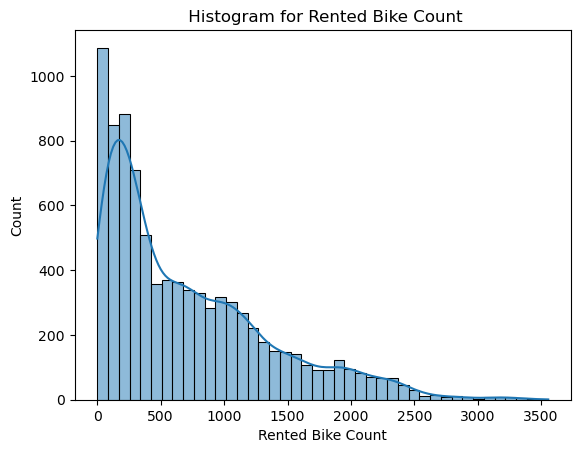

In [26]:
sns.histplot(x=df['Rented Bike Count'],kde=True)
plt.title(" Histogram for Rented Bike Count")

Text(0.5, 1.0, 'Rented Bike Count')

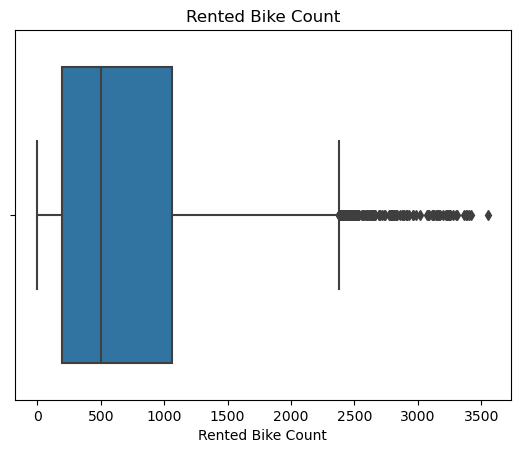

In [27]:
sns.boxplot(x=df['Rented Bike Count'])
plt.title("Rented Bike Count")

In [28]:
log_Rented_Bike_count = np.log(df["Rented Bike Count"])
print(log_Rented_Bike_count)
print(log_Rented_Bike_count.skew())

0       5.537334
23      5.777652
22      5.986452
21      6.003887
20      6.054439
          ...   
8306    5.231109
8305    5.840642
8304    6.122493
8315    6.665684
8326    6.930495
Name: Rented Bike Count, Length: 8760, dtype: float64
nan


c:\Users\Msc 1\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [29]:
sqrt_Rented_Bike_count = np.sqrt(df["Rented Bike Count"])
print(sqrt_Rented_Bike_count)
print(sqrt_Rented_Bike_count.skew())

0       15.937377
23      17.972201
22      19.949937
21      20.124612
20      20.639767
          ...    
8306    13.674794
8305    18.547237
8304    21.354157
8315    28.017851
8326    31.984371
Name: Rented Bike Count, Length: 8760, dtype: float64
0.237362090985412


In [30]:
Rented_Bike_count1 = 1 / df["Rented Bike Count"]
print(Rented_Bike_count1.skew())

nan


In [31]:
has_zero_or_negative = (df['Rented Bike Count'] <= 0).any()

if has_zero_or_negative:
    print("The 'Rented Bike Count' column contains 0 or negative values.")
else:
    print("The 'Rented Bike Count' column does not contain 0 or negative values.")

The 'Rented Bike Count' column contains 0 or negative values.


In [32]:
df = df[df['Rented Bike Count'] != 0]

In [33]:
Ren_boxcox, Ren_lambda = sp.stats.boxcox(df['Rented Bike Count'])
print(Ren_lambda)

0.2766900187171405


In [34]:
Rented_Bike_Count_boxcox = ((((df['Rented Bike Count'])**Ren_lambda) - 1) / Ren_lambda)
print(Rented_Bike_Count_boxcox)
print(Rented_Bike_Count_boxcox.skew())

0       13.112152
23      14.262154
22      15.325334
21      15.416921
20      15.684985
          ...    
8306    11.753318
8305    14.576442
8304    16.051825
8315    19.241206
8326    20.978708
Name: Rented Bike Count, Length: 8465, dtype: float64
-0.0817281746670998


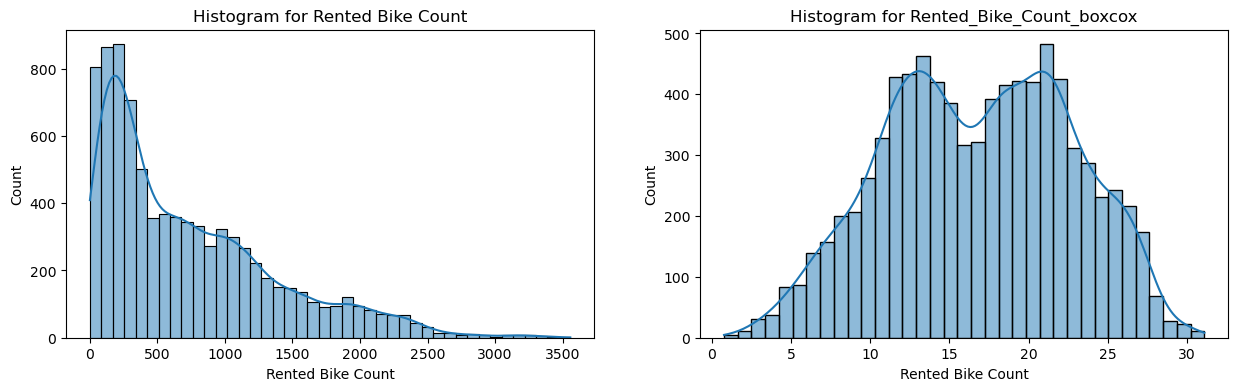

In [35]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.histplot(x="Rented Bike Count", data = df, kde = True)
plt.title("Histogram for Rented Bike Count")
plt.subplot(1,2,2)
sns.histplot(x = Rented_Bike_Count_boxcox,data=Rented_Bike_Count_boxcox, kde = True)
plt.title("Histogram for Rented_Bike_Count_boxcox")
plt.show()

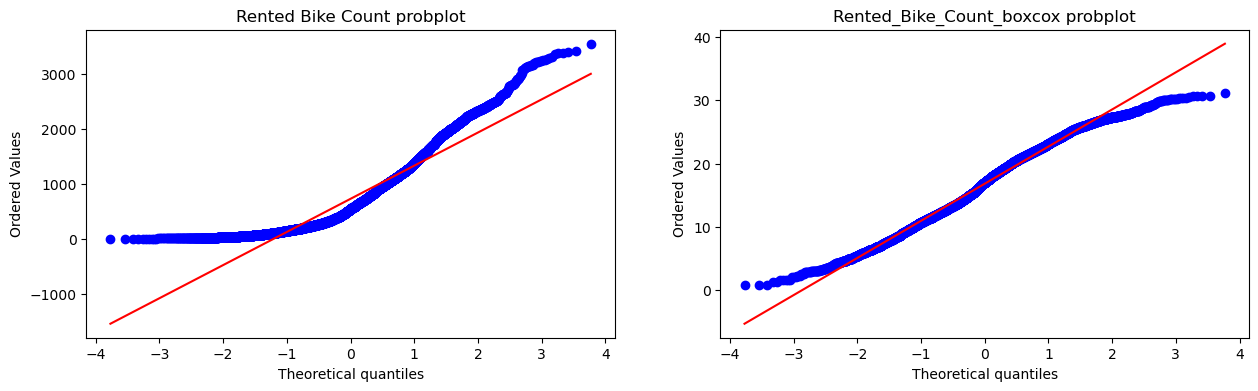

In [36]:
fig,axes = plt.subplots(1,2,figsize=(15,4))
sp.stats.probplot(df['Rented Bike Count'], plot = axes[0])
axes[0].set_title("Rented Bike Count probplot")
sp.stats.probplot(Rented_Bike_Count_boxcox, plot = axes[1])
axes[1].set_title("Rented_Bike_Count_boxcox probplot")
plt.show()

In [37]:
num_features = df.shape[1]# to count the no of columns available
print(num_features)

14


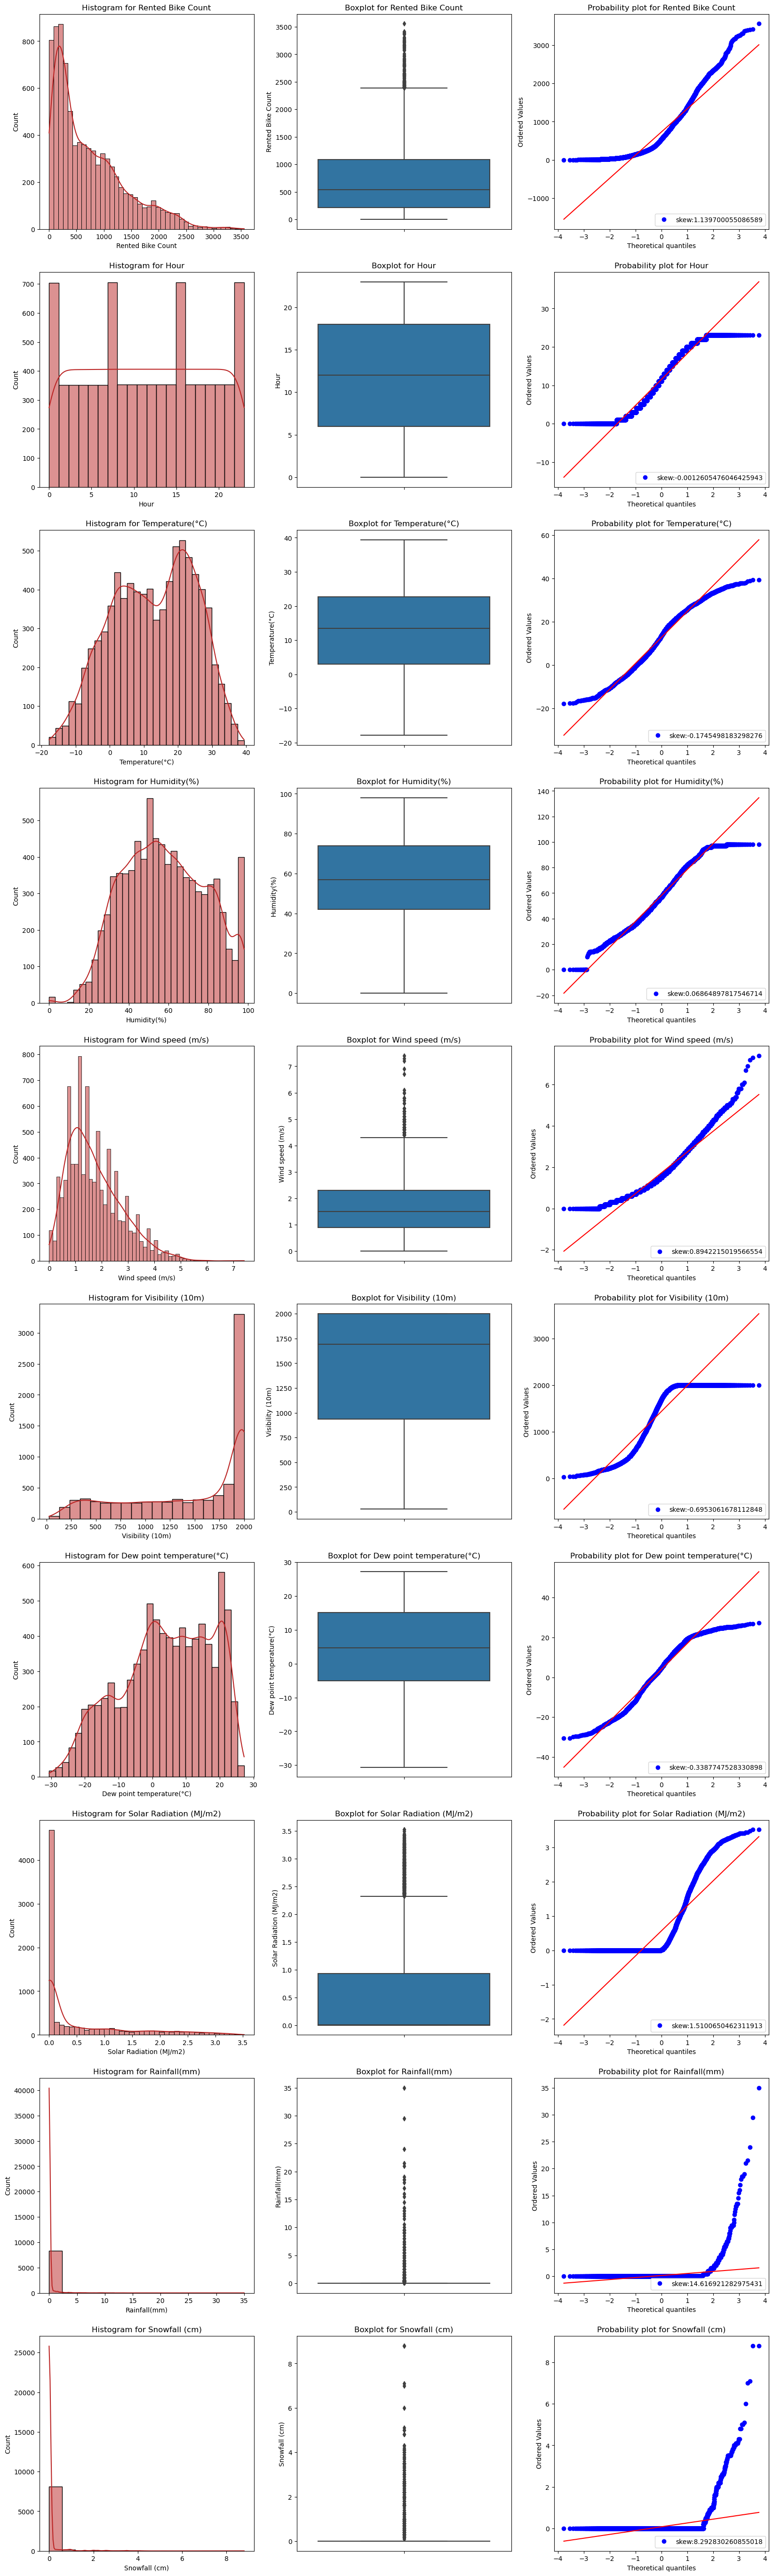

In [38]:
i=1
plt.figure(figsize=(20,70))
for feature in df:
        if feature not in ['Date', 'Seasons', 'Holiday','Functioning Day']:
            #histogram
            plt.subplot(10,3,i)
            sns.histplot(x=df[feature],kde= True,color="#BB2525")
            plt.title("Histogram for {}".format(feature))
            i+=1
            # Boxplot
            plt.subplot(10,3,i)
            sns.boxplot(y=df[feature],data = df)
            plt.title("Boxplot for {}".format(feature))
            i+=1
            #probplot
            plt.subplot(10,3,i)
            sp.stats.probplot(x=df[feature], plot=plt)
            plt.title("Probability plot for {}".format(feature))
            plt.legend(labels=[f'skew:{df[feature].skew()}'],loc = 'lower right')
            i+=1


In [39]:
df = df[df['Rented Bike Count'] != 0]
df = df[df['Hour'] != 0]
df = df[df['Humidity(%)'] != 0]
df = df[df['Wind speed (m/s)'] != 0]
df = df[df['Visibility (10m)'] != 0]

Cols_to_normalize=['Rented Bike Count','Hour','Humidity(%)','Wind speed (m/s)','Visibility (10m)']

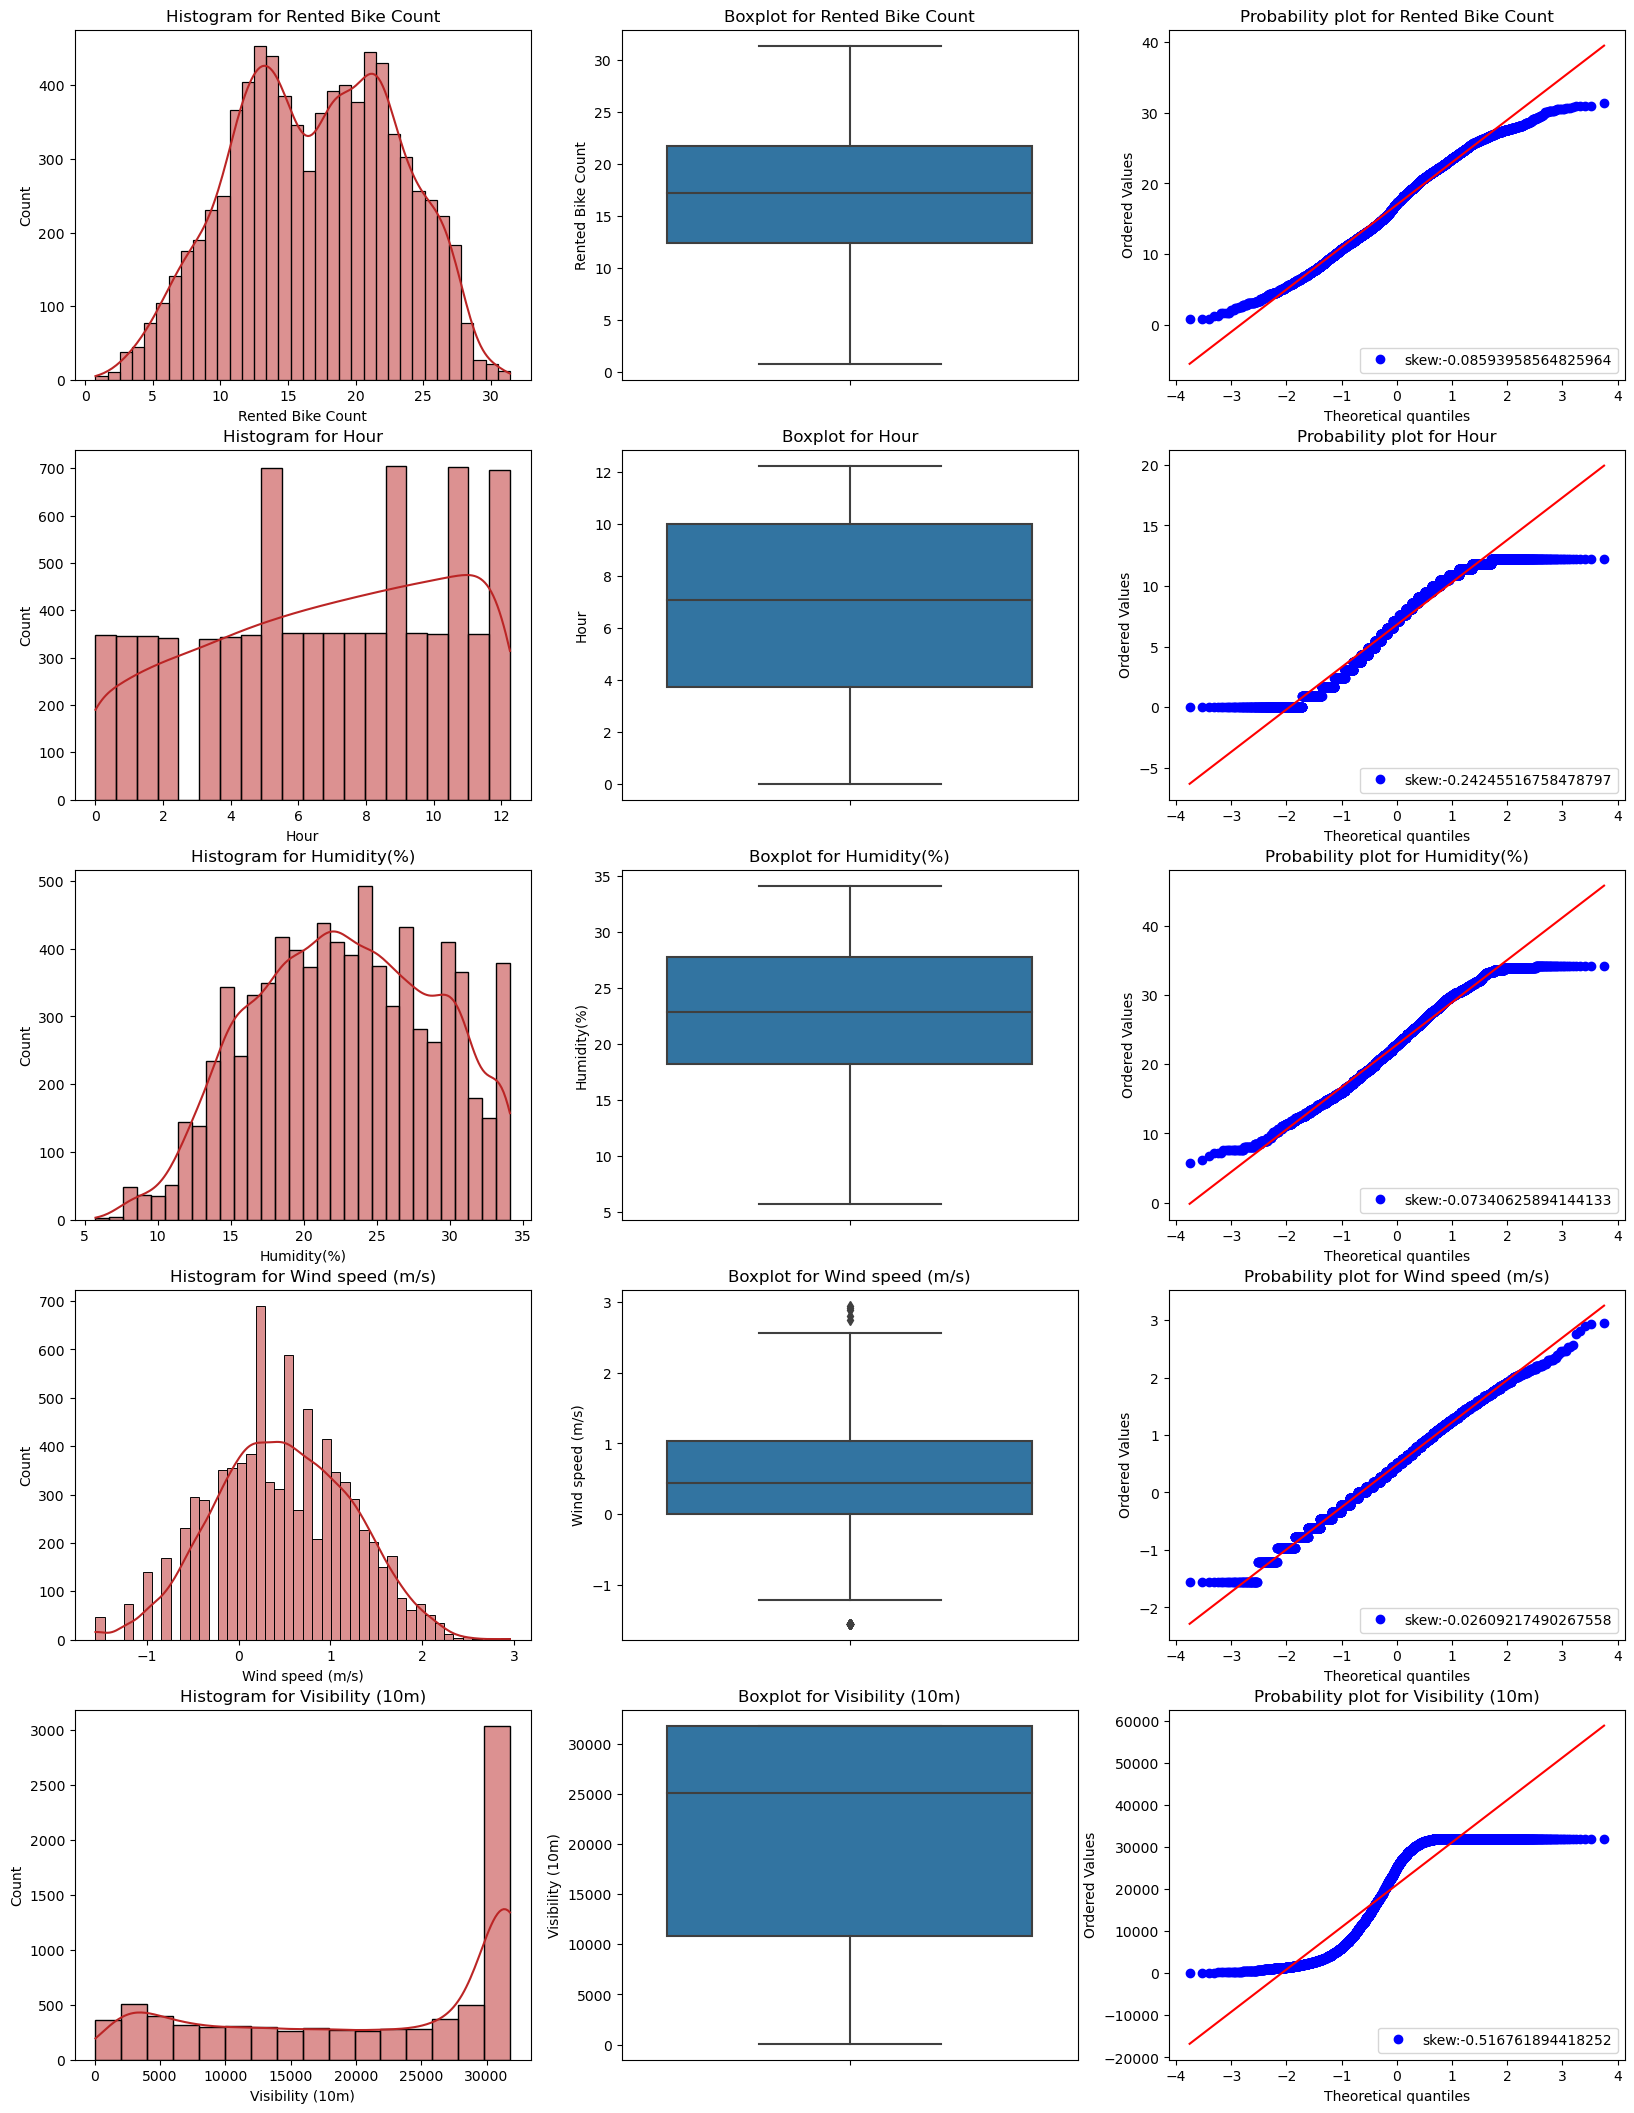

In [40]:
#After Normalizing
i=1
plt.figure(figsize=(20,70))
dataf= pd.DataFrame()

for feature in Cols_to_normalize:
        #boxcox
        Normalize_value, lamb = sp.stats.boxcox(df[feature])
        Normal_Boxcox = (((df[feature]**lamb) - 1) /lamb)
        dataf[feature] = Normal_Boxcox

        #histogram
        plt.subplot(13,3,i)
        sns.histplot(x=Normal_Boxcox,kde= True,color="#BB2525")
        plt.title("Histogram for {}".format(feature))
        i+=1
        # Boxplot
        plt.subplot(13,3,i)
        sns.boxplot(y=Normal_Boxcox,data = Normal_Boxcox)
        plt.title("Boxplot for {}".format(feature))
        i+=1
        #probplot
        plt.subplot(13,3,i)
        sp.stats.probplot(x=Normal_Boxcox, plot=plt)
        plt.title("Probability plot for {}".format(feature))
        plt.legend(labels=[f'skew:{Normal_Boxcox.skew()}'],loc = 'lower right')
        i+=1


In [41]:
df.skew()

C:\Users\Msc 1\AppData\Local\Temp\ipykernel_9808\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Rented Bike Count             1.109679
Hour                         -0.009858
Temperature(°C)              -0.181151
Humidity(%)                   0.123329
Wind speed (m/s)              0.909635
Visibility (10m)             -0.691955
Dew point temperature(°C)    -0.345238
Solar Radiation (MJ/m2)       1.433173
Rainfall(mm)                 14.549036
Snowfall (cm)                 8.262683
dtype: float64

In [42]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [43]:
# cols_to_normalise=['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
#        'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
#        'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
#        'Holiday', 'Functioning Day']

cols_to_normalise=['Rented Bike Count','Hour','Humidity(%)','Wind speed (m/s)','Visibility (10m)']

In [44]:
df1= pd.DataFrame()
for feature in cols_to_normalise:
        #boxcox
        Normalize_value, lamb = sp.stats.boxcox(df[feature])
        Normal_Boxcox = (((df[feature]**lamb) - 1) /lamb)
        df1[feature] = Normal_Boxcox
df1

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m)
23,14.357826,12.255558,30.489283,0.000000,16672.904457
22,15.432589,11.818217,30.222243,0.437103,18847.717526
21,15.525193,11.375561,29.685262,-0.214273,25013.892913
20,15.796250,10.927268,29.144310,0.437103,29861.827908
19,17.736698,10.472978,28.599255,0.585672,31793.075727
...,...,...,...,...,...
8307,10.094684,1.689465,25.234349,-1.555814,31793.075727
8306,11.823394,0.903725,25.521455,0.512860,31793.075727
8305,14.675496,0.000000,25.807265,0.275377,31793.075727
8315,19.394433,6.560527,17.538220,-0.334370,24701.069379


In [45]:
df1.skew()

Rented Bike Count   -0.085940
Hour                -0.242455
Humidity(%)         -0.073406
Wind speed (m/s)    -0.026092
Visibility (10m)    -0.516762
dtype: float64

**Constructing  95% confidence Interval for mean , myu when sigma^2 is not known**

In [46]:
df['Rented Bike Count'].mean()

739.434674305642

***TESTING HYPOTHESIS***

**1. After Normalising the data, we're trying to predict the mean number of Rented Bike Count**

**2.A testing Hypothesis is done to check the same.**

**3.:μ= 739.5 Vs H_1 : μ =! 739.5**


In [47]:
from scipy import stats

In [48]:
data = df['Rented Bike Count'] 
population_mean = 739.5 
#95% confidence interval
alpha = 0.05  
#Sample data
sample_data = data  # Use the entire dataset
sample_mean = sum(sample_data) / len(sample_data)#sample mean
sample_stddev = (sum((x - sample_mean) ** 2 for x in sample_data) / (len(sample_data) - 1)) ** 0.5#sample standard deviation
n = len(sample_data)#sample size
z = (sample_mean - population_mean) / (sample_stddev / (n ** 0.5))#Z-Value
p = 2 * (1 - stats.norm.cdf(abs(z)))#p-value
# Checking to reject the null hypothesis or not.
if p < alpha:
    print(f"Reject the null hypothesis")
else:
    print(f"Do not reject the null hypothesis")


Do not reject the null hypothesis
